In [1]:
import sys
sys.path.append('../')
import re

import cv2
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
figsize(5, 5)

In [2]:
float_str2int = lambda x: int(round(float(x)))

In [4]:
def face_eliptical2rectangle(face):
    theta = np.radians(face['angle'])
    a = face['axes_length'][0]
    b = face['axes_length'][1]

    x = np.sqrt(a**2*np.cos(theta)**2+b**2*np.sin(theta)**2)
    y = np.sqrt(a**2*np.sin(theta)**2+b**2*np.cos(theta)**2)

    x_min = float_str2int(face['center'][0] - x)
    x_max = float_str2int(face['center'][0] + x)

    y_min = float_str2int(face['center'][1] - y)
    y_max = float_str2int(face['center'][1] + y)
    
    return (x_min, y_min), (x_max, y_max)

In [5]:
file = open("../data/FDDB-folds/FDDB-fold-01-ellipseList.txt", 'r')
line = file.readline()

images = []

while line!='':
    im = {}
    line = line.rstrip('\n')
    
    im['path'] = line
    faces_n = int(file.readline().rstrip('\n'))
    
    faces = []
    for i in range(faces_n):
        
        #print('Reading Faces')
        line = file.readline().rstrip('\n')
        #print(line)
        
        major, minor, angle, center_x, center_y, _ = re.split(' +', line)
        
        face = {
            'axes_length': (float_str2int(major), float_str2int(minor)),
            'angle': np.degrees(float(angle)),
            'center': (float_str2int(center_x),float_str2int(center_y))
        }
        face['bounding_box'] = face_eliptical2rectangle(face)
        faces.append(face)
        
    im['faces'] = faces
    line = file.readline()    
    images.append(im)    
file.close()


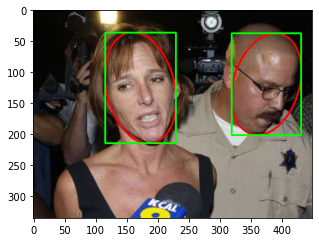

In [6]:
image = images[189]

mat = cv2.imread('../data/originalPics/'+image['path']+'.jpg', cv2.IMREAD_COLOR)

faces = image['faces']

for face in faces:
    start_point, end_point = face['bounding_box']
    
    mat = cv2.ellipse(mat, face['center'], face['axes_length'], face['angle'], 0, 360,(0,0,255), 2)
    
    mat = cv2.rectangle(mat, start_point, end_point, (0,255,0), 2)

plt.imshow(cv2.cvtColor(mat, cv2.COLOR_BGR2RGB))
plt.show()